**This notebook is about**:
* Requesting data on corona virus from [GOV.UK Coronavirus(COVID-19) Open Data API](https://coronavirus.data.gov.uk/details/developers-guide/main-api)
* Doing some pretty quick and dirty data exploration
* Getting some simple statistics
* Visualising the results

In [1]:
from requests import get
import json

**Helper function to request data over API**

In [2]:
def get_data(url):
    response = get(url, timeout = 10)
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: {response.text}')
    return response.json()

In [3]:
endpoint = ('https://api.coronavirus.data.gov.uk/v1/data?'
            'filters=areaType=nation;areaName=england&'
            'structure={"date":"date","newCases":"newCasesByPublishDate"}'
           )

In [4]:
data = get_data(endpoint)

**Import required modules and set Matplotlib defaults**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

warnings.filterwarnings('ignore')

#### Analyse the dataset

In [6]:
d = data['data']
print(len(d))

973


In [7]:
print(d[0])                # sample row

{'date': '2022-09-29', 'newCases': 46853}


In [9]:
df = pd.DataFrame(d).set_index('date')
df.head(10)

,newCases
date,
2022-09-29,46853
2022-09-28,0
2022-09-27,0
2022-09-26,0
2022-09-25,0
2022-09-24,0
2022-09-23,0
2022-09-22,33497
2022-09-21,0


In [10]:
print(df.shape)
print(type(df.index))

(973, 1)
<class 'pandas.core.indexes.base.Index'>


**Convert the index to datetime object for easy plottting**

In [11]:
df.index = df.index.map(lambda p: pd.to_datetime(p, format = '%Y-%m-%d', errors = 'ignore'))
df.head(10)

,newCases
date,
2022-09-29,46853
2022-09-28,0
2022-09-27,0
2022-09-26,0
2022-09-25,0
2022-09-24,0
2022-09-23,0
2022-09-22,33497
2022-09-21,0


In [12]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


#### Number of New Cases by month and year

In [13]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.head()
df.head()

,newCases,year,month,day
date,,,,
2022-09-29,46853,2022,9,29
2022-09-28,0,2022,9,28
2022-09-27,0,2022,9,27
2022-09-26,0,2022,9,26
2022-09-25,0,2022,9,25


**Monthly New Cases by Year**

In [15]:
monthly_newCases = df.groupby(['year', 'month'])['newCases'].sum().unstack()
monthly_newCases.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_newCases.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2020,2.0,19.0,20990.0,97335.0,34904.0,8324.0,18138.0,28790.0,98204.0,470102.0,544631.0,738164.0
2021,1201293.0,317103.0,143220.0,66170.0,64180.0,263853.0,955133.0,775311.0,784544.0,1075411.0,987257.0,2339626.0
2022,3145803.0,1225523.0,1750471.0,733033.0,221425.0,366753.0,518297.0,191369.0,135663.0,NaN,NaN,NaN


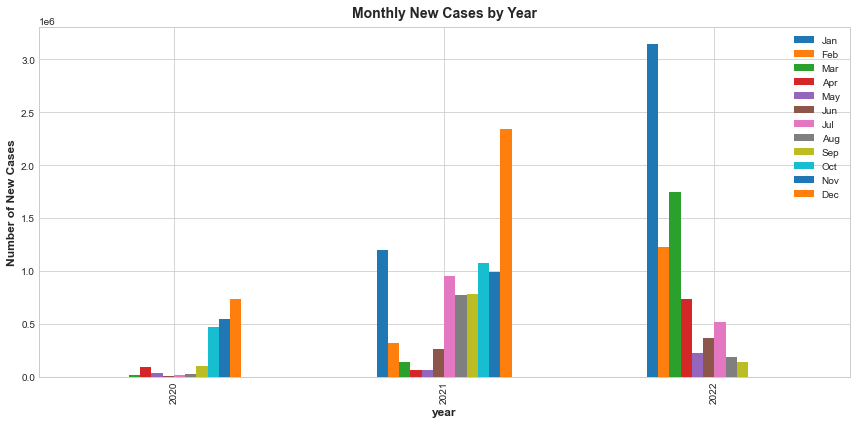

In [16]:
monthly_newCases.plot(kind = 'bar', figsize = (12, 6))
plt.title('Monthly New Cases by Year')
plt.ylabel('Number of New Cases')
plt.show()

The outbreak of **Omicron** in **December 2021 - January 2022** is clear visible on the chart. The gradual return to normalcy can also be seen from the *drastic decline* in the number of **New Cases as of `September 30, 2022`**!

Similar effect during the outbreak of **Delta** in **December 2020 - January 2021** can also be seen on the chart.

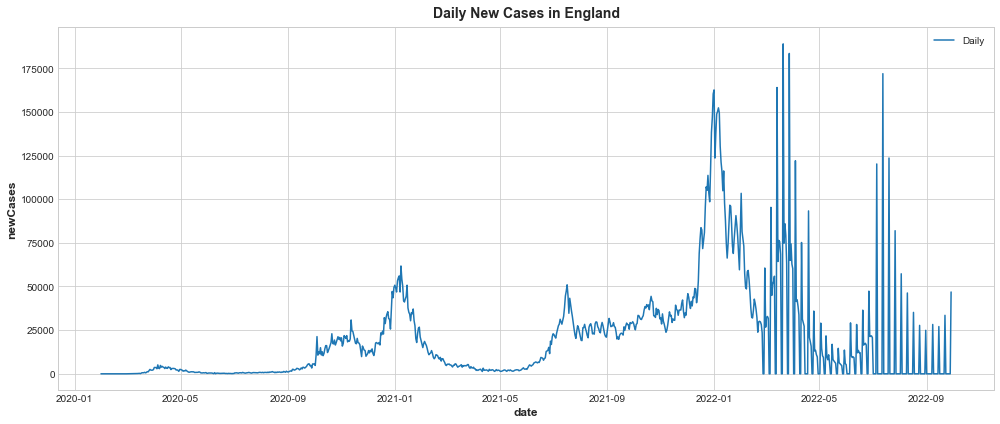

In [17]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = df.newCases, label = 'Daily')
plt.title('Daily New Cases in England')
plt.show()

#### Yearly Aggregate

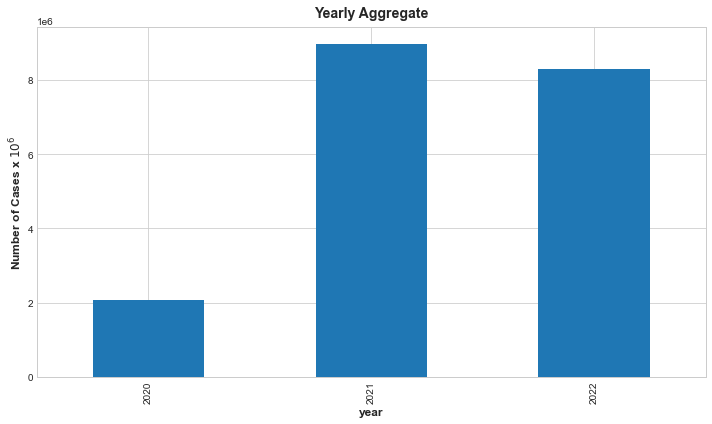

In [24]:
df.groupby(['year'])['newCases'].sum().plot(kind = 'bar', figsize = (10, 6))
plt.title('Yearly Aggregate')
plt.ylabel('Number of Cases x $10^6$')
plt.show()